# Recursive State Estimation - Exersices
Gerald Baulig

## Exercise 2

Suppose we live at a place where days are either sunny, cloudy, or rainy. The weather transition function is a Markov chain with the following transition table:

|       |        |       |          |       |
|-------|--------|-------|----------|-------|
|       |        |       | tomorrow |       |
|       |        | sunny |  cloudy  | rainy |
|       |  sunny |  0.8  |    0.2   |  0.0  |
| today | cloudy |  0.4  |    0.4   |  0.2  |
|       |  rainy |  0.2  |    0.6   |  0.2  |

### Exercise 2.a)
- Suppose Day 1 is a sunny day. What is the probability of the following sequence of days: Day2 = $cloudy$, Day3 = $cloudy$, Day4 = $rainy$?

Each day in a sequence creates a subset of its propbability of occurrence:

Sequence $x = [sunny, cloudy, cloudy, rainy]$

define: $(sunny=1, cloudy=2, rainy=3)$

$$
\begin{array}{ cccc }
P(X_1=1 \cap X_2=2 \cap X_3=2 \cap X_4=3)
\\
= P(X_1=1) \times P(X_2=2|X_1=1) \times P(X_3=2|X_2=2) \times P(X_4=3|X_3=2)
\end{array}
$$

Day 1 is sunny as a fact: $P(X_1=1) = 1.0$ <br>
Transition day 1,2: $P(X_2=2|X_1=1) = 0.2$ <br>
Transition day 2,3: $P(X_3=2|X_2=2) = 0.4$ <br>
Transition day 3,4: $P(X_4=3|X_3=2) = 0.2$

Hence:

$$
1.0 \times 0.2 \times 0.4 \times 0.2 = 0.016
$$

The probability that sequence $x$ occures is $0.016$

**References**

1. Sebastian Thrun, Wolfram Burgard, Dieter Fox: "Probabilistic Robotics", Exercises Chaper 2, The MIT Press 2006

2. https://github.com/pptacher/probabilistic_robotics/blob/master/ch2_recursive_state_estimation/ch2_recursive_state_estimation.pdf

### Exercise 2.b)

- Write a simulator that can randomly generate sequences of “weathers” from this state transition function.

In [17]:
import matplotlib.pyplot as plt
from tabulate import tabulate
import numpy as np

np.random.seed(5)
weather = ('sunny', 'cloudy', 'rainy')
lookup = {k:v for v, k in enumerate(weather)}
transition = np.array((.8, .2, 0, .4, .4, .2, .2, .6, .2)).reshape(3,3)

#transform props to decision-borders
D = transition.copy()
for i in range(1,D.shape[0]):
    D[:,i] += D[:,i-1]

data = zip(('sunny', 'cloudy', 'rainy'), *D.T)
print("Decition borders:")
print(tabulate(data, ('   tomorrow\ntoday', 'sunny', 'cloudy', 'rainy'), tablefmt='orgtbl'))

#Generator:
def sim_weather(first_day, days_to_gen):
    event = np.random.rand(days_to_gen)
    today = lookup[first_day]
    sequence = [None for i in range(days_to_gen)]
    probability = 1.0

    for i, e in enumerate(event):
        tomorrow = np.argmax(e <= D[today]) #find first true
        sequence[i] = weather[tomorrow]
        probability *= transition[today,tomorrow]
        today = tomorrow
    return sequence, probability, event

#Result
sequence, probability, event = sim_weather('sunny', 10)
print("\nEvents:\n", event)
print("\nGenerated sequence:\n", sequence)
print("Probability:", probability)

Decition borders:
|    tomorrow   |   sunny |   cloudy |   rainy |
| today         |         |          |         |
|---------------+---------+----------+---------|
| sunny         |     0.8 |      1   |       1 |
| cloudy        |     0.4 |      0.8 |       1 |
| rainy         |     0.2 |      0.8 |       1 |

Events:
 [0.22199317 0.87073231 0.20671916 0.91861091 0.48841119 0.61174386
 0.76590786 0.51841799 0.2968005  0.18772123]

Generated sequence:
 ['sunny', 'cloudy', 'sunny', 'cloudy', 'cloudy', 'cloudy', 'cloudy', 'cloudy', 'sunny', 'sunny']
Probability: 0.00010485760000000006


### Exercise 2.c)

- Use your simulator to determine the stationary distribution of this Markov chain. The stationary distribution measures the probability that a random day will be sunny, cloudy, or rainy.

Stationary distribution:
|   sunny |   cloudy |   rainy |
|---------+----------+---------|
|   0.645 |   0.2813 |  0.0737 |


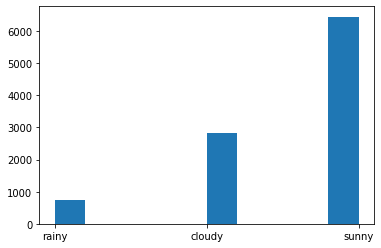

In [18]:
np.random.seed(4)
sequence, probability, event = sim_weather('rainy', 10000)
sequence = np.array(sequence)

data = [((sequence == 'sunny').mean(),
         (sequence == 'cloudy').mean(),
         (sequence == 'rainy').mean())]
print("Stationary distribution:")
print(tabulate(data,('sunny', 'cloudy', 'rainy'), tablefmt='orgtbl'))
plt.hist(sequence)
plt.show()

### Exercise 2.d)

- Can you devise a closed-form solution to calculating the stationary distribution based on the state transition matrix above?

**Definition:** "The stationery distribution of a Markov Chain with transition matrix $P$ is some vector, $\psi$, such that $\psi P = \psi$." (1)

Hense:

$$
\begin{bmatrix}
\psi_1 & \psi_2 & \psi_3 \\
\end{bmatrix}
\times
\begin{bmatrix}
0.8 & 0.2 & 0.0 \\
0.4 & 0.4 & 0.2 \\
0.2 & 0.6 & 0.2
\end{bmatrix}
=
\begin{bmatrix}
\psi_1 & \psi_2 & \psi_3 \\
\end{bmatrix}
$$

$$
\begin{array}{ cccc }
.8\psi_1 - \psi_1 + .4\psi_2 + .2\psi_3 = 0
\\
.2\psi_1 + .4\psi_2 - \psi_2 + .6\psi_3 = 0
\\
\psi_1 + \psi_2 + \psi_3 = 1
\end{array}
$$


Powered by: https://www.mathportal.org/calculators/system-of-equations-solver/system-3x3.php

$$
\begin{array}{cccc}
\color{red}{ -\frac{ 1 }{ 5 } } x&\color{blue}{ +\frac{ 2 }{ 5 } } y&\color{green}{ +\frac{ 1 }{ 5 } } z&=0\\
\color{red}{ \frac{ 1 }{ 5 } } x&\color{blue}{ -\frac{ 3 }{ 5 } } y&\color{green}{ +\frac{ 3 }{ 5 } } z&=0\\
\color{red}{ } x&\color{blue}{ + } y&\color{green}{ + } z&=1
\end{array}
$$

#### The solutions are:
$$ x = \frac{ 9 }{ 14 } ,y = \frac{ 2 }{ 7 } ,z = \frac{ 1 }{ 14 } $$

#### Explanation:

**Step 1:** Find the determinant of the *coefficient matrix*:

$$ 
D= \left| \begin{array}{ ccc }\color{red}{ -\frac{ 1 }{ 5 } }&\color{blue}{ \frac{ 2 }{ 5 } }&\color{green}{ \frac{ 1 }{ 5 } }\\\color{red}{ \frac{ 1 }{ 5 } }&\color{blue}{ -\frac{ 3 }{ 5 } }&\color{green}{ \frac{ 3 }{ 5 } }\\\color{red}{ 1 }&\color{blue}{ 1 }&\color{green}{ 1 }\end{array} \right| = \frac{ 14 }{ 25 }
$$

**Step 2:** Find the determinant of the *x - matrix* $(D_x)$. *X - matrix* is formed by replacing the x-column values with the answer-column values.

$$ D_x= \left| \begin{array}{ ccc }\color{black}{ 0 }&\color{blue}{ \frac{ 2 }{ 5 } }&\color{green}{ \frac{ 1 }{ 5 } }\\\color{black}{ 0 }&\color{blue}{ -\frac{ 3 }{ 5 } }&\color{green}{ \frac{ 3 }{ 5 } }\\\color{black}{ 1 }&\color{blue}{ 1 }&\color{green}{ 1 }\end{array} \right| = \frac{ 9 }{ 25 } $$<p class="uvucen"><b>Step 3:</b> Find the determinant of the <b>y - matrix</b>. </p>$$ D_y= \left| \begin{array}{ ccc }\color{red}{ -\frac{ 1 }{ 5 } }&\color{black}{ 0 }&\color{green}{ \frac{ 1 }{ 5 } }\\\color{red}{ \frac{ 1 }{ 5 } }&\color{black}{ 0 }&\color{green}{ \frac{ 3 }{ 5 } }\\\color{red}{ 1 }&\color{black}{ 1 }&\color{green}{ 1 }\end{array} \right| = \frac{ 4 }{ 25 } $$<p class="uvucen"><b>Step 4:</b> Find the determinant of the <b>z - matrix</b>. </p>$$ D_z= \left| \begin{array}{ ccc }\color{red}{ -\frac{ 1 }{ 5 } }&\color{blue}{ \frac{ 2 }{ 5 } }&\color{black}{ 0 }\\\color{red}{ \frac{ 1 }{ 5 } }&\color{blue}{ -\frac{ 3 }{ 5 } }&\color{black}{ 0 }\\\color{red}{ 1 }&\color{blue}{ 1 }&\color{black}{ 1 }\end{array} \right| = \frac{ 1 }{ 25 } $$<p class="uvucen" style="padding:0;"><b>Cramers Rule says that the solutions are </b></p>$$ x = \frac{D_x}{D} ,y = \frac{D_y}{D},z = \frac{D_z}{D} $$<p class="uvucen" style="padding:0;"><b>So, in this example we have:</b></p>$$ \begin{aligned}  x &= \frac{D_x}{D} = \frac{ \frac{ 9 }{ 25 } }{ \frac{ 14 }{ 25 } } = \frac{ 9 }{ 14 } \\ y &= \frac{D_y}{D} = \frac{ \frac{ 4 }{ 25 } }{ \frac{ 14 }{ 25 } } = \frac{ 2 }{ 7 } \\z &= \frac{D_z}{D} = \frac{ \frac{ 1 }{ 25 } }{ \frac{ 14 }{ 25 } } = \frac{ 1 }{ 14 } \end{aligned} $$

**References:**

1. https://www.stat.berkeley.edu/~mgoldman/Section0220.pdf
2. https://stackoverflow.com/questions/31791728/python-code-explanation-for-stationary-distribution-of-a-markov-chain

#### Via Numpy Solve

In [19]:
EQ = transition.copy().T
EQ[(0,1),(0,1)] -= 1
EQ[-1,:] = 1
p = np.linalg.solve(EQ, [0,0,1])

print("EQ:\n", EQ)
print("\nStationary distribution:")
print(tabulate(p[None,:],('sunny', 'cloudy', 'rainy'), tablefmt='orgtbl'))

EQ:
 [[-0.2  0.4  0.2]
 [ 0.2 -0.6  0.6]
 [ 1.   1.   1. ]]

Stationary distribution:
|    sunny |   cloudy |     rainy |
|----------+----------+-----------|
| 0.642857 | 0.285714 | 0.0714286 |


#### Via Eigenvector

Stationary distribution:
|    sunny |   cloudy |     rainy |
|----------+----------+-----------|
| 0.642857 | 0.285714 | 0.0714286 |


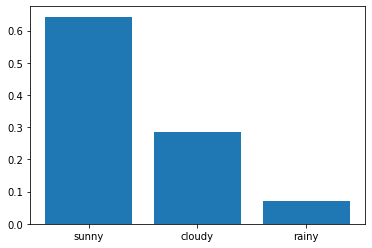

In [20]:
evals, evecs = np.linalg.eig(transition.T)
evec1 = evecs[:,np.isclose(evals, 1)]
evec1 = evec1[:,0]
p = evec1 / evec1.sum()
p = p.real
headers = ('sunny', 'cloudy', 'rainy')

print("Stationary distribution:")
print(tabulate(p[None,:], headers, tablefmt='orgtbl'))
plt.bar(headers, p)
plt.show()

### Exercise 2.e)

- What is the entropy of the stationary distribution?

**Definition:** "The entropy is the expected information that the value of $x$ carries." (2)

$$
H(P,p) = -\sum_{i,j} p_i P_{i,j} \log_2 P_{i,j}
$$

**References:**

1. https://math.stackexchange.com/questions/1040972/entropy-of-a-markov-chain-right-result
2. Probabilistic Robotics

In [21]:
P = transition
i = np.arange(P.shape[0])
j = np.arange(P.shape[1])
bits = -np.log2(P[i,j])
entropy = np.sum(p[i] * P[i,j] * bits)
print("Bits required for x:\n", bits, '?')
print("The entropy is:\n", entropy)

Bits required for x:
 [0.32192809 1.32192809 2.32192809] ?
The entropy is:
 0.34981091814187576


### Exercise 2.e)

- Using Bayes rule, compute the probability table of yesterday’s weather given today’s weather. (It is okay to provide the probabilities numerically, and it is also okay to rely on results from previous questions in this exercise.)

**Bayes rule (2.16):**

$$
\begin{array}{ cccc }
P(X_{t-1}=i|X_t=j) = \eta P(X_t=j | X_{t-1}=i) \times P(X_{t-1}=i)
\\
= \frac{P(X_t=j | X_{t-1}=i) \times P(X_{t-1}=i)}{P(X_t=j)}
\\
= \frac{P^T \times \psi_i}{\psi_j} = P_{t-1}
\end{array}
$$

In [22]:
Py = (P.T * p).T / p
print("Transition matrix to yesterday")
headers = ('   yesterday\ntoday', 'sunny', 'cloudy', 'rainy')
data = zip(('sunny', 'cloudy', 'rainy'), *Py)
table = tabulate(data, headers, tablefmt='orgtbl')
print(table)

Transition matrix to yesterday
|    yesterday   |   sunny |   cloudy |     rainy |
| today          |         |          |           |
|----------------+---------+----------+-----------|
| sunny          |    0.8  | 0.177778 | 0.0222222 |
| cloudy         |    0.45 | 0.4      | 0.15      |
| rainy          |    0    | 0.8      | 0.2       |


### Exercise 2.g)

- Suppose we added seasons to our model. The state transition function above would only apply to the Summer, whereas different ones would apply to Winter, Spring, and Fall. Would this violate the Markov property of this process? Explain your answer.

"*The Markov assumption postulates that past and future data are independent
if one knows the current state* $x_t$". (1)

Violations: "*Unmodeled dynamics in the environment not included in* $x_t$" (1)

**Hence:** The Markov property is not given, unless the season is included in $x_t$.
We cannot simply switch between different transition-matrices, since this would violate the overall distribution to -> 1.

To restore the Markov property, we could incorporate the season into the state variable.

**References:**

1. Probabilistic Robotics

## Exercise 3

Suppose that we cannot observe the weather directly, but instead rely on
a sensor. The problem is that our sensor is noisy. Its measurements are
governed by the following measurement model:

|       |        |       |          |       |
|-------|--------|-------|----------|-------|
|       |        |       |  sensor  |       |
|       |        | sunny |  cloudy  | rainy |
|       |  sunny |  0.6  |    0.4   |  0.0  |
| true  | cloudy |  0.3  |    0.7   |  0.0  |
|       |  rainy |  0.0  |    0.0   |  1.0  |

### Exercise 3.a)

- Suppose Day 1 is $sunny$ (this is known for a fact), and in the subsequent four days our sensor observes $cloudy, cloudy, rainy, sunny$. What is the probability that Day 5 is indeed $sunny$ as predicted by our sensor?

**Define:** $(sunny, cloudy, rainy) = (1,2,3)$

Sequence $z = [1, 2, 2, 3, 1]$

$X_1 = 1$

$$
P_1 = \begin{bmatrix}
0.8 & 0.2 & 0.0\\
0.4 & 0.4 & 0.2\\
0.2 & 0.6 & 0.2
\end{bmatrix}
$$

$$
P_2 = \begin{bmatrix}
0.6 & 0.4 & 0.0\\
0.3 & 0.7 & 0.0\\
0.0 & 0.0 & 1.0
\end{bmatrix}
$$

#### Day2

sunny --> sunny

$$
P(X_2=1|z_2)=\eta P_2(Z_2=2|X_2=1) \times P_1(X_2=1)
\\
= \eta 0.4 \times 0.8 = 0.32\eta
$$

sunny --> cloudy

$$
P(X_2=2|z_2)=\eta P_2(Z_2=2|X_2=2) \times P_1(X_2=2)
\\
= \eta 0.7 \times 0.2 = 0.14\eta
$$

sunny --> rainy

$$
P(X_2=3|z_2)=\eta P_2(Z_2=2|X_2=3) \times P_1(X_2=3)
\\
= \eta 0.0 \times 0.0 = 0
$$

where $\eta$:

$$
\eta = \frac{1}{0.32 + 0.14 + 0} \approx 2.174
$$

$P(X_2=1|z_2) = 0.32\eta \approx 0.70$ <br>
$P(X_2=2|z_2) = 0.14\eta \approx 0.30$ <br>
$P(X_2=3|z_2) = 0.0$

#### Day3

$$
P(X_3=i|z_{2:3})=\eta P_2(Z_3=2|X_3=i) \times \sum^3_{j=1}{P_1(X_3=i|X_2=j)} \times P(X_2=j|z_{2:3})
$$

$$
\begin{array}{ cccc }
P(X_3=1|z_{2:3}) = \eta 0.4 \times (0.8 \times 0.7 + 0.4 \times 0.3 + 0.2 \times 0.0) = 0.272\eta
\\
P(X_3=2|z_{2:3}) = \eta 0.7 \times (0.2 \times 0.7 + 0.4 \times 0.3 + 0.6 \times 0.0) = 0.182\eta
\\
P(X_3=3|z_{2:3}) = \eta 0.0 \times (0.0 \times 0.7 + 0.2 \times 0.3 + 0.2 \times 0.0) = 0.0
\end{array}
$$

where $\eta$:

$$
\eta = \frac{1}{0.272 + 0.182 + 0} \approx 2.203
$$

$P(X_3=1|z_{2:3}) = 0.272\eta \approx 0.6$ <br>
$P(X_3=2|z_{2:3}) = 0.182\eta \approx 0.4$ <br>
$P(X_3=3|z_{2:3}) = 0.0$

#### Day4

$$P(X_4=i|z_{2:4})=\eta P_2(Z_4=3|X_4=i) \times \sum^3_{j=1}{P_1(X_4=i|X_3=j)} \times P(X_3=j|z_{2:4})$$

$$
\begin{array}{ cccc }
P(X_4=1|z_{2:4}) = \eta 0.0 \times \dots = 0.0
\\
P(X_4=2|z_{2:4}) = \eta 0.0 \times \dots = 0.0
\\
P(X_4=3|z_{2:4}) = \eta 1.0 \times (0.0 \times 0.599 + 0.2 \times 0.282 + 0.2 \times 0.0) = 0.0564\eta
\end{array}
$$

where $\eta$:

$$
\eta = \frac{1}{0.0564}
$$

$P(X_4=3|z_{2:4}) = 1$

#### Day 5

$$
P(X_5=i|z_{2:5})=\eta P_2(Z_5=2|X_5=i) \times \sum^3_{j=1}{P_1(X_5=i|X_4=j)} \times P(X_4=j|z_{2:4})
$$

$$
\begin{array}{ cccc }
P(X_5=1|z_{2:5})=\eta 0.6 \times (0.8 \times 0 + 0.4 \times 0 + 0.2 \times 1.0) = 0.12\eta
\\
P(X_5=2|z_{2:5})=\eta 0.3 \times (0.2 \times 0 + 0.4 \times 0 + 0.6 \times 1.0) = 0.18\eta
\\
P(X_5=3|z_{2:5})=\eta 0.0 \times \dots = 0.0
\end{array}
$$

where $\eta$:

$$
\eta = \frac{1}{0.12 + 0.18}
$$

$P(X_5=1|z_{2:5})=0.4$ <br>
$P(X_5=2|z_{2:5})=0.6$ <br>
$P(X_5=3|z_{2:5})=0.0$

**Hence:**

The probability for Day 5 to be indeed $sunny$ is $0.4$, although the probability for being $cloudy$ is actually higher with $0.6$.

**Matrix recursive form:**

$sunny = [1,0,0]$ <br>
$cloudy = [0,1,0]$ <br>
$rainy = [0,0,1]$ <br>
$p_t = sunny$ <br>
$z = [sunny, cloudy, cloudy, rainy, sunny]$

$$
p_{t+1} = 
\frac{(z_t \cdot P_2) (p_t \cdot P_1)}
{|(z_t \cdot P_2) (p_t \cdot P_1)|}
$$

#### Now with Numpy:

In [23]:
P1 = transition.copy()
P2 = np.array((.6, .4, 0, .3, .7, 0, 0, 0, 1)).reshape(3,3)
z = ('sunny', 'cloudy', 'cloudy', 'rainy', 'sunny')
z = [lookup[k] for k in z]
pt = [1,0,0]

def sens_weather(pt, P1, P2, z):
    yield np.array(pt)
    for tday in z[1:]:
        pt = P2[:,tday] * np.dot(pt, P1)
        pt = pt / pt.sum()
        yield pt

data = {'':('sunny', 'cloudy', 'rainy', 'most-likely', 'measured')}
for i, pt in enumerate(sens_weather(pt, P1, P2, z)):
    key = "Day{}".format(i+1)
    data[key] = ["{:01.4f}".format(f) for f in pt]
    data[key].append(weather[np.argmax(pt)])
    data[key].append(weather[z[i]])
    
print(tabulate(data, headers='keys', tablefmt='orgtbl'))

|             | Day1   | Day2   | Day3   | Day4   | Day5   |
|-------------+--------+--------+--------+--------+--------|
| sunny       | 1.0000 | 0.6957 | 0.5977 | 0.0000 | 0.4000 |
| cloudy      | 0.0000 | 0.3043 | 0.4023 | 0.0000 | 0.6000 |
| rainy       | 0.0000 | 0.0000 | 0.0000 | 1.0000 | 0.0000 |
| most-likely | sunny  | sunny  | sunny  | rainy  | cloudy |
| measured    | sunny  | cloudy | cloudy | rainy  | sunny  |


### Exercise 3.b)

- Once again, suppose Day 1 is known to be $sunny$. At Days 2 through 4, the sensor measures $sunny, sunny, rainy$. For each of the Days 2 through 4, what is the most likely weather on that day? Answer the question in two ways: one in which only the data available to the day in question is used, and one in hindsight, where data from future days is also available.

#### First: Without future knowledge

In [24]:
P1 = transition.copy()
P2 = np.array((.6, .4, 0, .3, .7, 0, 0, 0, 1)).reshape(3,3)
z = ('sunny', 'sunny', 'sunny', 'rainy')
z = [lookup[k] for k in z]
pt = [1,0,0]

data = {'':('sunny', 'cloudy', 'rainy', 'most-likely', 'measured')}
probs = np.zeros((len(z),3))
for i, pt in enumerate(sens_weather(pt, P1, P2, z)):
    key = "Day{}".format(i+1)
    data[key] = ["{:01.4f}".format(f) for f in pt]
    data[key].append(weather[np.argmax(pt)])
    data[key].append(weather[z[i]])
    probs[i] = pt

data['Prob'] = (
    *probs.prod(axis=0), 
    probs.max(axis=1).prod(), 
    probs[range(len(z)),z].prod()
)
print(tabulate(data, headers='keys', tablefmt='orgtbl'))

|             | Day1   | Day2   | Day3   | Day4   |     Prob |
|-------------+--------+--------+--------+--------+----------|
| sunny       | 1.0000 | 0.8889 | 0.8718 | 0.0000 | 0        |
| cloudy      | 0.0000 | 0.1111 | 0.1282 | 0.0000 | 0        |
| rainy       | 0.0000 | 0.0000 | 0.0000 | 1.0000 | 0        |
| most-likely | sunny  | sunny  | sunny  | rainy  | 0.774929 |
| measured    | sunny  | sunny  | sunny  | rainy  | 0.774929 |


Without future knowledge the measured sequence is indeed most-likely.

#### Second: With future knowledge

In this case we require the transposed transition-matrix to determine the probabilities from tommorow to today.

$$
P_1^T = \begin{bmatrix}
0.8 & 0.4 & 0.2\\
0.2 & 0.4 & 0.6\\
0.0 & 0.2 & 0.2
\end{bmatrix}
$$

$$
P_2^T = \begin{bmatrix}
0.6 & 0.3 & 0.0\\
0.4 & 0.7 & 0.0\\
0.0 & 0.0 & 1.0
\end{bmatrix}
$$

In [25]:
pt = [1,0,0]

#Re-define sens_weather with future support
def sens_weather(pt, P1, P2, z, wfuture=False):
    yield np.array(pt)
    for i, tday in enumerate(z[1:]):
        #simulate the prop from future to current day
        if wfuture and len(z) > i+2:
            pf = np.ones(3)
            C = P2.T
            A = P1.T
            for future in z[i+2:]:
                C = np.dot(C, A)
                pf *= C[future]
        else:
            pf = 1
        #from past to current day
        pt = P2[:,tday] * np.dot(pt, P1) * pf
        pt = pt / pt.sum()
        yield pt

probs = np.zeros((len(z),3))
for i, pt in enumerate(sens_weather(pt, P1, P2, z, wfuture=True)):
    key = "Day{}".format(i+1)
    data[key] = ["{:01.4f}".format(f) for f in pt]
    data[key].append(weather[np.argmax(pt)])
    data[key].append(weather[z[i]])
    probs[i] = pt

data['Prob'] = (
    *probs.prod(axis=0), 
    probs.max(axis=1).prod(), 
    probs[range(len(z)),z].prod()
)   
print(tabulate(data, headers='keys', tablefmt='orgtbl'))

|             | Day1   | Day2   | Day3   | Day4   |   Prob |
|-------------+--------+--------+--------+--------+--------|
| sunny       | 1.0000 | 0.8000 | 0.0000 | 0.0000 |    0   |
| cloudy      | 0.0000 | 0.2000 | 1.0000 | 0.0000 |    0   |
| rainy       | 0.0000 | 0.0000 | 0.0000 | 1.0000 |    0   |
| most-likely | sunny  | sunny  | cloudy | rainy  |    0.8 |
| measured    | sunny  | sunny  | sunny  | rainy  |    0   |


W.r.t the future the measured sequence is no-more the most-likely one.
In the presented table we can easily read the probabilities of each day.

### Exercise 3.c)

- Consider the same situation (Day 1 is $sunny$, the measurements for Days 2, 3, and 4 are $sunny, sunny, rainy$). What is the most likely sequence of weather for Days 2 through 4? What is the probability of this most likely sequence?

Please see the tables of *Exercise 3.b)*.
All answers are included in those.

**Without future**

|             | Day1   | Day2   | Day3   | Day4   | Prob of seq |
|-------------|--------|--------|--------|--------|-------------|
| sunny       | 1.0000 | 0.8889 | 0.8718 | 0.0000 | 0           |
| cloudy      | 0.0000 | 0.1111 | 0.1282 | 0.0000 | 0           |
| rainy       | 0.0000 | 0.0000 | 0.0000 | 1.0000 | 0           |
| most-likely | sunny  | sunny  | sunny  | rainy  | 0.774929    |
| measured    | sunny  | sunny  | sunny  | rainy  | 0.774929    |

**W.r.t future**

|             | Day1   | Day2   | Day3   | Day4   | Prob of seq |
|-------------|--------|--------|--------|--------|-------------|
| sunny       | 1.0000 | 0.8000 | 0.0000 | 0.0000 |    0        |
| cloudy      | 0.0000 | 0.2000 | 1.0000 | 0.0000 |    0        |
| rainy       | 0.0000 | 0.0000 | 0.0000 | 1.0000 |    0        |
| most-likely | sunny  | sunny  | cloudy | rainy  |    0.8      |
| measured    | sunny  | sunny  | sunny  | rainy  |    0        |